## Exploratory Data Analysis Part 2

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
# Read from extracted data 
df_flights_raw = pd.read_csv("../data/raw/flights_raw.csv")
df_passengers_raw = pd.read_csv("../data/raw/passengers_raw.csv")
df_fuel_raw = pd.read_csv("../data/raw/fuel_raw.csv")

In [3]:
# Take copy to measure data loss after clean-up
df_flights = df_flights_raw.copy()
df_passengers = df_passengers_raw.copy()
df_fuel = df_fuel_raw.copy()

#### **Task 6**: How many states cover 50% of US air traffic? 

In [121]:
origin_dest = df_flights.filter(['flights', 'origin_city_name', 'dest_city_name'])
origin_dest[['origin_city', 'origin_state']] = origin_dest['origin_city_name'].str.split(", ",expand=True,) 
origin_dest[['dest_city', 'dest_state']] = origin_dest['dest_city_name'].str.split(", ",expand=True,) 

# drop unwanted column
origin_dest = origin_dest.drop(['origin_city_name', 'dest_city_name', 'origin_city', 'dest_city'], axis=1) 
origin_dest

,flights,origin_state,dest_state
0,1.0,NJ,DC
1,1.0,FL,MI
2,1.0,AL,GA
3,1.0,WA,CO
4,1.0,HI,HI
...,...,...,...
9995,1.0,VA,PA
9996,1.0,GA,GA
9997,1.0,UT,CO
9998,1.0,NC,NY


In [122]:
# Count of origin states
origin_state_count = origin_dest.groupby(by = 'origin_state').count().sort_values(by = 'flights', ascending=False)
origin_state_count.head()

,flights,dest_state
origin_state,,
CA,1157,1157
TX,992,992
FL,733,733
IL,662,662
NY,534,534


In [123]:
# Delete unwanted column
del origin_state_count['dest_state']

# Rename column name
origin_state_count.rename(columns={'flights':'origin_flights'}, inplace=True)
origin_state_count.head()

,origin_flights
origin_state,
CA,1157
TX,992
FL,733
IL,662
NY,534


In [124]:
# Count of dest states
dest_state_count = origin_dest.groupby(by = 'dest_state').count().sort_values(by = 'flights', ascending=False)

# Delete unwanted column
del dest_state_count['origin_state']

#rename column name
dest_state_count.rename(columns={'flights':'dest_flights'}, inplace=True)
dest_state_count.head()

,dest_flights
dest_state,
CA,1091
TX,973
FL,754
IL,599
NY,532


In [125]:
# Join dataframes on common states index
df_state = origin_state_count.join(dest_state_count)

# Fill nan value with zero
df_state['origin_flights'] = df_state['origin_flights'].fillna(0)
df_state['dest_flights'] = df_state['dest_flights'].fillna(0)

# Sum origin and dest
df_state['total_flights'] = df_state['origin_flights'] + df_state['dest_flights']

# Sort in descending order
df_state.sort_values('total_flights', ascending = False)
df_state.head()


,origin_flights,dest_flights,total_flights
origin_state,,,
CA,1157,1091,2248
TX,992,973,1965
FL,733,754,1487
IL,662,599,1261
NY,534,532,1066


In [126]:
df_state['percentage_origin_flights'] = df_state['origin_flights']/sum(df_state['origin_flights'])*100
df_state.reset_index(inplace=True)
df_state.head()

,origin_state,origin_flights,dest_flights,total_flights,percentage_origin_flights
0,CA,1157,1091,2248,11.57
1,TX,992,973,1965,9.92
2,FL,733,754,1487,7.33
3,IL,662,599,1261,6.62
4,NY,534,532,1066,5.34


In [127]:
df_state['percentage_dest_flights'] = df_state['dest_flights']/sum(df_state['dest_flights'])*100
df_state.reset_index(inplace=True)
df_state.head()

,index,origin_state,origin_flights,dest_flights,total_flights,percentage_origin_flights,percentage_dest_flights
0,0,CA,1157,1091,2248,11.57,10.91
1,1,TX,992,973,1965,9.92,9.73
2,2,FL,733,754,1487,7.33,7.54
3,3,IL,662,599,1261,6.62,5.99
4,4,NY,534,532,1066,5.34,5.32


In [128]:
df_state['percentage_total_flights'] = df_state['total_flights']/sum(df_state['total_flights'])*100
df_state.reset_index(inplace=True)
df_state.head()

,level_0,index,origin_state,origin_flights,dest_flights,total_flights,percentage_origin_flights,percentage_dest_flights,percentage_total_flights
0,0,0,CA,1157,1091,2248,11.57,10.91,11.240
1,1,1,TX,992,973,1965,9.92,9.73,9.825
2,2,2,FL,733,754,1487,7.33,7.54,7.435
3,3,3,IL,662,599,1261,6.62,5.99,6.305
4,4,4,NY,534,532,1066,5.34,5.32,5.330


In [129]:
top50_origin = []
percentage_origin = 0

for index, row in df_state.iterrows():
    percentage_origin += row['percentage_origin_flights']
    if percentage_origin > 50:
        break
    top50_origin.append(row['origin_state'])
    
    
print('Number of US States comprising 50% US origin air flights: ', len(top50_origin))
print('US States: ', top50_origin)

Number of US States comprising 50% US origin air flights:  6
US States:  ['CA', 'TX', 'FL', 'IL', 'NY', 'GA']


In [130]:
top50_dest = []
percentage_dest = 0

for index, row in df_state.iterrows():
    percentage_dest += row['percentage_dest_flights']
    if percentage_dest > 50:
        break
    top50_dest.append(row['origin_state'])
    
    
print('Number of US States comprising 50% US destination air flights: ', len(top50_dest))
print('US States: ', top50_dest)

Number of US States comprising 50% US destination air flights:  7
US States:  ['CA', 'TX', 'FL', 'IL', 'NY', 'GA', 'NC']


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [4]:
# Check flights data
df_flights.head()
df_flights.columns
df_flights['air_time'].sort_values(ascending=False)

499     544.0
1234    538.0
3483    497.0
9871    490.0
5207    469.0
        ...  
9909      NaN
9931      NaN
9955      NaN
9984      NaN
9989      NaN
Name: air_time, Length: 10000, dtype: float64

In [5]:
# Divide the flight into short, medium, and long haul flights based on air-time
length=[]

for i in df_flights['air_time']:
    if i < (180): # less than 3 hours
        length.append('short')
    elif (i >= (180)) and (i <= (360)): #between 3 and 6 hours
        length.append('medium')
    else: length.append('long') # more than 6 hours

df_flights['haul_length'] = length   

In [6]:
df_flights['haul_length'].value_counts()

short     8487
medium    1307
long       206
Name: haul_length, dtype: int64

In [7]:
# Compare values in 2 similar columns
df_flights.filter(items=['dep_time', 'crs_dep_time']) # dep_time - float64; crs_dep_time - int64

,dep_time,crs_dep_time
0,1958.0,2000
1,1834.0,1839
2,524.0,530
3,1509.0,1505
4,925.0,930
...,...,...
9995,1652.0,1706
9996,1021.0,1026
9997,942.0,945
9998,1340.0,1313


In [8]:
# Create extra column named Zeros with str '00' values for time formating
df_flights.insert(0, 'Zeros', '00')

In [9]:
df_flights.head()

,Zeros,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,haul_length
0,00,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
1,00,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
2,00,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
3,00,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short
4,00,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short


In [10]:
# Create additional column for time formating (combine 2 columns)
df_flights["timeformat"] = df_flights['crs_dep_time'].astype(str) + df_flights["Zeros"]
df_flights.head()


,Zeros,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,haul_length,timeformat
0,00,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,200000
1,00,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,183900
2,00,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,53000
3,00,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,150500
4,00,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,93000


In [11]:
# Convert time to the proper format
time = pd.to_datetime(df_flights['timeformat'].astype(str).str.zfill(6), format='%H%M%S').dt.time
print (time)

0       20:00:00
1       18:39:00
2       05:30:00
3       15:05:00
4       09:30:00
          ...   
9995    17:06:00
9996    10:26:00
9997    09:45:00
9998    13:13:00
9999    16:46:00
Name: timeformat, Length: 10000, dtype: object


In [12]:
# Create column with CRS Departure Time in time format
df_flights['proper_crs_dep_time'] = time
df_flights.head()

,Zeros,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,haul_length,timeformat,proper_crs_dep_time
0,00,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,200000,20:00:00
1,00,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,183900,18:39:00
2,00,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,53000,05:30:00
3,00,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,150500,15:05:00
4,00,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,93000,09:30:00


In [13]:
# Drop supporting columns created before
df_flights.drop(columns=['Zeros', 'timeformat'])

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,haul_length,proper_crs_dep_time
0,2018-08-27,UA,UA_CODESHARE,UA,4900,C5,N16147,4900,11618,EWR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,20:00:00
1,2018-02-25,NK,NK,NK,892,NK,N665NK,892,13204,MCO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,18:39:00
2,2019-05-06,DL,DL,DL,2023,DL,N893AT,2023,12217,HSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,05:30:00
3,2018-09-24,WN,WN,WN,1995,WN,N725SW,1995,14747,SEA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,15:05:00
4,2018-01-23,HA,HA,HA,346,HA,N483HA,346,12173,HNL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,09:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2018-09-16,AA,AA_CODESHARE,AA,4912,PT,N609DP,4912,10990,CHO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,17:06:00
9996,2018-09-01,DL,DL_CODESHARE,DL,3494,9E,N8783E,3494,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,10:26:00
9997,2019-07-12,WN,WN,WN,2555,WN,N200WN,2555,14869,SLC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,09:45:00
9998,2019-05-27,AA,AA,AA,2731,AA,N856NN,2731,11057,CLT,...,NaN,NaN,NaN,NaN,1318.0,17.0,17.0,NaN,short,13:13:00


In [14]:
# Export updated flights df into new csv
df_flights.to_csv('../data/raw/flights_raw_haul_time.csv', index=False)

In [15]:
df_flights_raw_haul_time = pd.read_csv("../data/raw/flights_raw_haul_time.csv")
df_flights_haul_time = df_flights_raw_haul_time.copy()

In [16]:
# Create df with required columns for plotting
df_haul = df_flights_haul_time.filter(['haul_length', 'proper_crs_dep_time'], axis=1)
df_haul

,haul_length,proper_crs_dep_time
0,short,20:00:00
1,short,18:39:00
2,short,05:30:00
3,short,15:05:00
4,short,09:30:00
...,...,...
9995,short,17:06:00
9996,short,10:26:00
9997,short,09:45:00
9998,short,13:13:00


In [17]:
# Create new column with extracted hour value
df_haul['proper_crs_dep_time'] = pd.to_datetime(df_haul['proper_crs_dep_time'], format ='%H:%M:%S')
df_haul['crs_dep_hour'] = df_haul['proper_crs_dep_time'].dt.hour
df_haul.head()

,haul_length,proper_crs_dep_time,crs_dep_hour
0,short,1900-01-01 20:00:00,20
1,short,1900-01-01 18:39:00,18
2,short,1900-01-01 05:30:00,5
3,short,1900-01-01 15:05:00,15
4,short,1900-01-01 09:30:00,9


In [18]:
# Count numbers of short/medium/long flights based on hours of departure
flights_short = df_haul.loc[df_flights_haul_time['haul_length'] == 'short']
df_short = flights_short.groupby('crs_dep_hour')['haul_length'].count()  

flights_medium = df_haul.loc[df_flights_haul_time['haul_length'] == 'medium']
df_medium= flights_medium.groupby('crs_dep_hour')['haul_length'].count()

flights_long = df_haul.loc[df_flights_haul_time['haul_length'] == 'long']
df_long = flights_long.groupby('crs_dep_hour')['haul_length'].count()

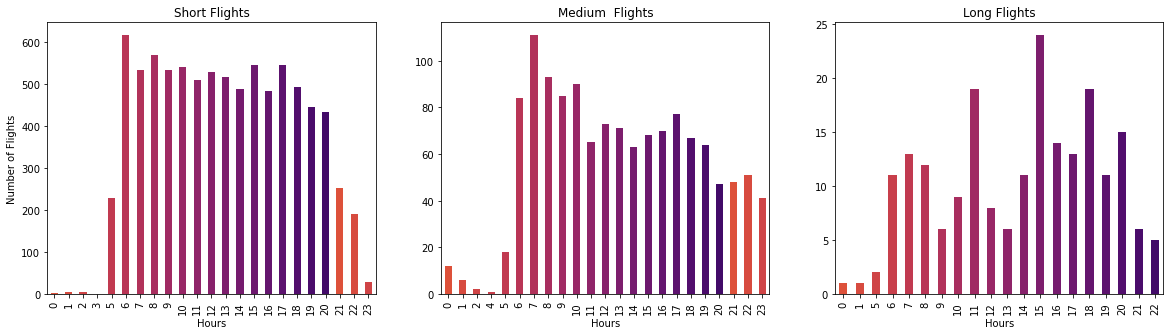

In [19]:
fig, grid = plt.subplots(1, 3, figsize=(20, 5))
color = cm.inferno_r(np.linspace(.4, .8, 20))

df_short.plot(ax=grid[0], kind='bar', stacked=True, color=color, legend=False, figsize=(20, 5))
grid[0].set_title('Short Flights')
grid[0].set_ylabel('Number of Flights')
grid[0].set_xlabel('Hours')

df_medium.plot(ax=grid[1], kind='bar', stacked=True, color=color, legend=False, figsize=(20, 5))
grid[1].set_title('Medium  Flights')
grid[1].set_xlabel('Hours')

df_long.plot(ax=grid[2], kind='bar', stacked=True, color=color, legend=False, figsize=(20, 5))
grid[2].set_title('Long Flights')
grid[2].set_xlabel('Hours')

plt.show()



#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [20]:
origin_flights = df_flights.filter(['origin', 'flights'])
origin_flights

,origin,flights
0,EWR,1.0
1,MCO,1.0
2,HSV,1.0
3,SEA,1.0
4,HNL,1.0
...,...,...
9995,CHO,1.0
9996,ATL,1.0
9997,SLC,1.0
9998,CLT,1.0


In [38]:
origin_flights_count = origin_flights.groupby(by = 'origin').count().sort_values(by = 'flights', ascending=False).reset_index().head(10)
origin_flights_count

,origin,flights
0,ORD,507
1,ATL,473
2,DFW,397
3,LAX,346
4,DEN,346
5,CLT,328
6,SEA,239
7,SFO,228
8,IAH,224
9,PHX,217


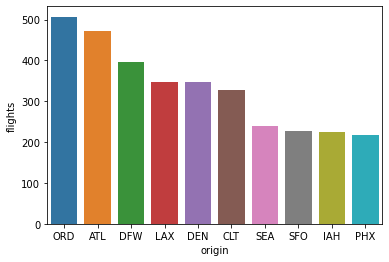

In [42]:
ax2 = sns.barplot(x='origin', y='flights', data=origin_flights_count)

In [23]:
origin_passengers = df_passengers.filter(['origin', 'passengers'])
origin_passengers

,origin,passengers
0,JFK,144.0
1,CVN,416.0
2,PDX,0.0
3,BTR,52.0
4,MDW,3796.0
...,...,...
9995,AMA,73.0
9996,IND,5076.0
9997,DSM,0.0
9998,ATL,2841.0


In [39]:
origin_passenger_count = origin_passengers.groupby(by = 'origin').count().sort_values(by = 'passengers', ascending=False).reset_index().head(10) 
origin_passenger_count

,origin,passengers
0,ORD,344
1,ATL,273
2,DEN,247
3,LAX,226
4,IAH,219
5,DTW,194
6,MIA,188
7,DFW,186
8,MSP,167
9,EWR,162


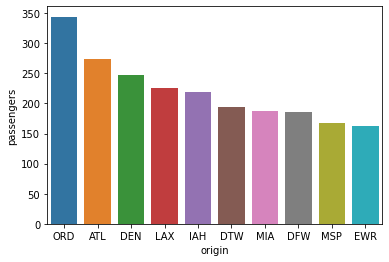

In [40]:
ax2 = sns.barplot(x='origin', y='passengers', data=origin_passenger_count)

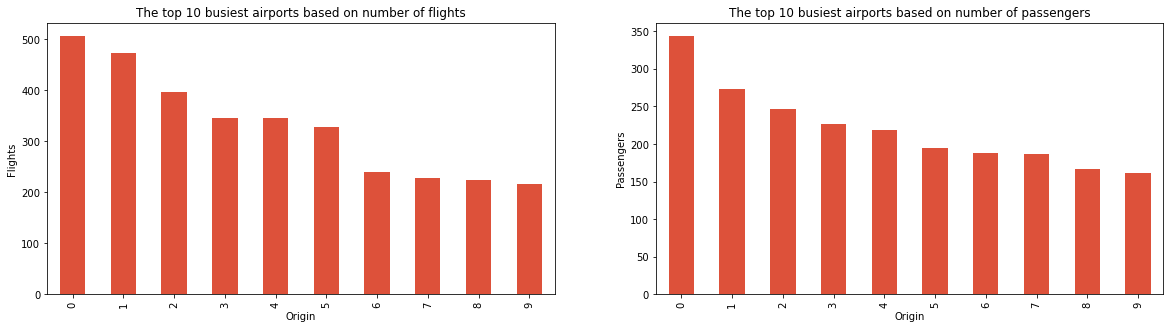

In [41]:
fig, grid = plt.subplots(1, 2, figsize=(20, 5))
color = cm.inferno_r(np.linspace(.4, .8, 30))

origin_flights_count.plot(ax=grid[0], kind='bar', stacked=True, color=color, legend=False, figsize=(20, 5))
grid[0].set_title('The top 10 busiest airports based on number of flights')
grid[0].set_ylabel('Flights')
grid[0].set_xlabel('Origin')

origin_passenger_count.plot(ax=grid[1], kind='bar', stacked=True, color=color, legend=False, figsize=(20, 5))
grid[1].set_title('The top 10 busiest airports based on number of passengers')
grid[1].set_ylabel('Passengers')
grid[1].set_xlabel('Origin')


plt.show()

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?